In [1]:
# takes 2m
# create acbl and tcg result score/matchpoint dictionaries
# experiment with result dictionaries
# create some charts

# previous steps:
# acbl-clean-board-results.ipynb created acbl-board-results-cleaned.pkl
# TheCommonGameCommonResultsHtmlToPickle.py created ../TheCommonGame/tcg_boards_df.pkl.

# todo:
# todo: why are there 10,000,000 non-numeric HandRecords?
# write acbl and tcg results to sql file?
# be able to view acbl and tcg results per board result
# use acbl or tcg results. Depends on num_of_tables?
# find new ways to filter out more garbage in board results
# reduce precision of freq_pct and mp_pct to 3 digits.
# validate EventBoardScores

In [2]:
# requirements:
# conda install -c conda-forge brotli

In [3]:
import pandas as pd
import pathlib
import pickle

In [ ]:
sys.path.append(str(pathlib.Path.cwd().parent))
sys.path
from mlBridgeLib import mlBridgeLib

In [4]:
# override pandas display options
mlBridgeLib.pd_options_display()

In [5]:
rootPath = pathlib.Path('e:/bridge/data')
acblPath = rootPath.joinpath('acbl')
tcgPath = rootPath.joinpath('TheCommonGame')

In [6]:
# takes 1s
# unused -- so far
tcg_boards_df_filename = 'tcg_boards_df.pkl'
tcg_boards_df_file = tcgPath.joinpath(tcg_boards_df_filename)
with open(tcg_boards_df_file, "rb") as f:
    tcg_df = pickle.load(f)
tcg_df

,EventBoard,Board,TCG_Link,L,Tricks,DDmakes,LoTT,Dealer,HCP,Hands,Vul,Par
130501A_01,130501A_01,01,http://tcgcloud.bridgefinesse.com/Results/20130501Rank.html#tab_board_36,"{""NS"": [5, 7, 5, 9], ""EW"": [8, 6, 8, 4]}","{""NS"": [5, 7, 5, 9, 6], ""EW"": [8, 6, 8, 4, 6]}","{""N"": [5, 7, 5, 9, 6], ""S"": [5, 7, 5, 9, 6], ""E"": [8, 6, 8, 4, 6], ""W"": [8, 6, 8, 4, 6]}","[17, 17, 0]",N,"{""N"": 10, ""W"": 12, ""E"": 9, ""S"": 9}","{""N"": [""AJ853"", ""3"", ""K42"", ""Q753""], ""W"": [""96"", ""AKJ82"", ""96"", ""AT82""], ""E"": [""Q2"", ""764"", ""QJT...",None,"[140, [[3, ""S"", """", 0]]]"
130501A_02,130501A_02,02,http://tcgcloud.bridgefinesse.com/Results/20130501Rank.html#tab_board_36,"{""NS"": [8, 6, 5, 7], ""EW"": [5, 7, 8, 6]}","{""NS"": [9, 7, 6, 7, 8], ""EW"": [4, 6, 7, 6, 5]}","{""N"": [9, 7, 6, 7, 8], ""S"": [9, 7, 6, 7, 8], ""E"": [4, 6, 7, 6, 5], ""W"": [4, 6, 7, 6, 5]}","[16, 16, 0]",E,"{""N"": 8, ""W"": 4, ""E"": 15, ""S"": 13}","{""N"": [""A876"", ""98"", ""AT63"", ""832""], ""W"": [""QJ952"", ""532"", ""J85"", ""54""], ""E"": [""T"", ""AQT74"", ""Q9...",N_S,"[120, [[2, ""N"", """", 0]]]"
130501A_03,130501A_03,03,http://tcgcloud.bridgefinesse.com/Results/20130501Rank.html#tab_board_36,"{""NS"": [8, 9, 7, 2], ""EW"": [5, 4, 6, 11]}","{""NS"": [10, 8, 7, 3, 3], ""EW"": [3, 5, 6, 10, 10]}","{""N"": [10, 8, 7, 3, 3], ""S"": [10, 8, 7, 3, 3], ""E"": [3, 5, 6, 10, 10], ""W"": [3, 5, 6, 10, 10]}","[18, 20, -2]",S,"{""N"": 8, ""W"": 9, ""E"": 13, ""S"": 10}","{""N"": [""9"", ""KT8"", ""KQ8743"", ""743""], ""W"": [""AQJT7632"", ""J2"", ""J6"", ""2""], ""E"": [""K54"", ""Q743"", ""A...",E_W,"[-100, [[5, ""C"", ""*"", -1]]]"
130501A_04,130501A_04,04,http://tcgcloud.bridgefinesse.com/Results/20130501Rank.html#tab_board_36,"{""NS"": [5, 3, 7, 11], ""EW"": [8, 10, 6, 2]}","{""NS"": [6, 6, 11, 11, 8], ""EW"": [7, 7, 2, 2, 5]}","{""N"": [6, 6, 11, 11, 8], ""S"": [6, 6, 11, 11, 8], ""E"": [7, 7, 2, 2, 5], ""W"": [7, 7, 2, 2, 5]}","[18, 21, -3]",W,"{""N"": 13, ""W"": 3, ""E"": 13, ""S"": 11}","{""N"": [""AQ9532"", ""A84"", ""J"", ""Q97""], ""W"": [""K"", ""963"", ""T8432"", ""T642""], ""E"": [""8"", ""QJ2"", ""AKQ9...",Both,"[650, [[5, ""H"", """", 0], [5, ""S"", """", 0]]]"
130501A_05,130501A_05,05,http://tcgcloud.bridgefinesse.com/Results/20130501Rank.html#tab_board_36,"{""NS"": [5, 11, 5, 5], ""EW"": [8, 2, 8, 8]}","{""NS"": [5, 11, 5, 5, 6], ""EW"": [8, 2, 8, 8, 7]}","{""N"": [5, 11, 5, 5, 6], ""S"": [5, 11, 5, 5, 6], ""E"": [8, 2, 8, 8, 7], ""W"": [8, 2, 8, 8, 7]}","[19, 19, 0]",N,"{""N"": 15, ""W"": 20, ""E"": 1, ""S"": 4}","{""N"": [""T963"", ""AKT"", ""AQ654"", ""Q""], ""W"": [""AKQJ7"", ""Q54"", ""K3"", ""AJ6""], ""E"": [""854"", ""J8732"", ""...",N_S,"[500, [[5, ""H"", ""*"", -3], [5, ""S"", ""*"", -3]]]"
130501A_06,130501A_06,06,http://tcgcloud.bridgefinesse.com/Results/20130501Rank.html#tab_board_36,"{""NS"": [6, 8, 6, 6], ""EW"": [7, 5, 7, 7]}","{""NS"": [7, 10, 7, 7, 9], ""EW"": [6, 3, 6, 6, 4]}","{""N"": [7, 10, 7, 7, 9], ""S"": [7, 10, 7, 7, 9], ""E"": [6, 3, 6, 6, 4], ""W"": [6, 3, 6, 6, 4]}","[16, 15, 1]",E,"{""N"": 9, ""W"": 14, ""E"": 5, ""S"": 12}","{""N"": [""Q86"", ""JT92"", ""T"", ""AQ873""], ""W"": [""T732"", ""AK4"", ""A92"", ""KT4""], ""E"": [""K54"", ""Q753"", ""8...",E_W,"[400, [[3, ""N"", """", 0]]]"
130501A_07,130501A_07,07,http://tcgcloud.bridgefinesse.com/Results/20130501Rank.html#tab_board_36,"{""NS"": [6, 5, 7, 8], ""EW"": [7, 8, 6, 5]}","{""NS"": [1, 1, 2, 3, 1], ""EW"": [12, 12, 11, 10, 12]}","{""N"": [1, 1, 2, 3, 1], ""S"": [1, 1, 2, 3, 1], ""E"": [12, 12, 11, 10, 12], ""W"": [12, 12, 11, 10, 12]}","[15, 16, -1]",S,"{""N"": 4, ""W"": 19, ""E"": 14, ""S"": 3}","{""N"": [""9763"", ""974"", ""QT9"", ""Q85""], ""W"": [""AK"", ""AQJ"", ""873"", ""AJ942""], ""E"": [""QJ4"", ""K53"", ""AK...",Both,"[-1440, [[6, ""N"", """", 0]]]"
130501A_08,130501A_08,08,http://tcgcloud.bridgefinesse.com/Results/20130501Rank.html#tab_board_36,"{""NS"": [10, 6, 5, 5], ""EW"": [3, 7, 8, 8]}","{""NS"": [9, 4, 4, 4, 6], "

In [7]:
# takes 8s
tcg_results_dict_filename = 'tcg_results_dict.pkl'
tcg_results_dict_file = tcgPath.joinpath(tcg_results_dict_filename)
with open(tcg_results_dict_file, "rb") as f:
    tcg_resultsd = pickle.load(f)
tcg_resultsd['130501A_01'], tcg_resultsd

([484,
  [[-180, 0, 3, 1.0, 0.002070393374741201],
   [-150, 3, 6, 5.5, 0.011387163561076604],
   [-140, 9, 4, 10.5, 0.021739130434782608],
   [-130, 13, 1, 13.0, 0.026915113871635612],
   [-120, 14, 3, 15.0, 0.031055900621118012],
   [-110, 17, 11, 22.0, 0.045548654244306416],
   [-100, 28, 14, 34.5, 0.07142857142857142],
   [-50, 42, 60, 71.5, 0.14803312629399587],
   [0, 102, 2, 102.5, 0.2122153209109731],
   [50, 104, 29, 118.0, 0.2443064182194617],
   [100, 133, 31, 148.0, 0.3064182194616977],
   [120, 164, 2, 164.5, 0.34057971014492755],
   [140, 166, 141, 236.0, 0.4886128364389234],
   [150, 307, 22, 317.5, 0.6573498964803313],
   [170, 329, 74, 365.5, 0.7567287784679089],
   [200, 403, 20, 412.5, 0.8540372670807453],
   [300, 423, 7, 426.0, 0.8819875776397516],
   [420, 430, 27, 443.0, 0.917184265010352],
   [450, 457, 6, 459.5, 0.9513457556935818],
   [500, 463, 6, 465.5, 0.9637681159420289],
   [530, 469, 9, 473.0, 0.979296066252588],
   [630, 478, 2, 478.5, 0.990683229813664

In [8]:
# takes 5s
tcg_results299_dict_filename = 'tcg_results299_dict.pkl'
tcg_results299_dict_file = tcgPath.joinpath(tcg_results299_dict_filename)
with open(tcg_results299_dict_file, "rb") as f:
    tcg_results299d = pickle.load(f)
tcg_results299d['130501A_01'], tcg_results299d

([93,
  [[-530, 0, 1, 0.0, 0.0],
   [-180, 1, 1, 1.0, 0.010869565217391304],
   [-150, 2, 2, 2.5, 0.02717391304347826],
   [-140, 4, 1, 4.0, 0.043478260869565216],
   [-130, 5, 1, 5.0, 0.05434782608695652],
   [-110, 6, 1, 6.0, 0.06521739130434782],
   [-100, 7, 3, 8.0, 0.08695652173913043],
   [-50, 10, 10, 14.5, 0.15760869565217392],
   [0, 20, 1, 20.0, 0.21739130434782608],
   [50, 21, 8, 24.5, 0.266304347826087],
   [100, 29, 11, 34.0, 0.3695652173913043],
   [110, 40, 3, 41.0, 0.44565217391304346],
   [120, 43, 1, 43.0, 0.4673913043478261],
   [140, 44, 22, 54.5, 0.592391304347826],
   [150, 66, 6, 68.5, 0.7445652173913043],
   [170, 72, 11, 77.0, 0.8369565217391305],
   [200, 83, 4, 84.5, 0.9184782608695652],
   [300, 87, 2, 87.5, 0.9510869565217391],
   [420, 89, 2, 89.5, 0.9728260869565217],
   [500, 91, 2, 91.5, 0.9945652173913043]]],
 {'130501A_01': [93,
   [[-530, 0, 1, 0.0, 0.0],
    [-180, 1, 1, 1.0, 0.010869565217391304],
    [-150, 2, 2, 2.5, 0.02717391304347826],
    [-

In [9]:
# take 17s for 9m rows
# read acbl results df
acbl_board_results_filename = 'acbl-board-results-cleaned.pkl'
acbl_board_results_file = acblPath.joinpath(acbl_board_results_filename)
acbl_cgdf = pd.read_pickle(acbl_board_results_file)
acbl_cgdf

,Key,ClubDate,EventBoard,HandRecord,Board,Pair,NNum,NName,SNum,SName,ENum,EName,WNum,WName,PairNS,PairEW,MP_NS,MP_EW,Score,Par,MatchP,Pct,NSPair,EWPair,BidLvl,BidSuit,Dbl,NSEW,Tricks,Declarer,OnLead,Dummy,NotOnLead,EventBoardScore
8760,100222_190821E_01,100222_190821E,190821E_01,8861,01,D02_D02,9264256,"""Cook, Karen""",2961628,"""Moore, Tom(swap names)""",7396295,"""Stanley, Tracy""",6497594,"""Langland, Richard(swap names)""",9264256_2961628,7396295_6497594,"[170.09, 1815.45]","[104.69, 1832.54]",-100,110,3.50,0.50,D02,D02,1,N,,N,-2,9264256,7396295,2961628,6497594,190821E_01_-100
8761,100222_190821E_02,100222_190821E,190821E_02,8861,02,D02_D02,9264256,"""Cook, Karen""",2961628,"""Moore, Tom(swap names)""",7396295,"""Stanley, Tracy""",6497594,"""Langland, Richard(swap names)""",9264256_2961628,7396295_6497594,"[170.09, 1815.45]","[104.69, 1832.54]",100,-300,5.00,0.71,D02,D02,4,D,,W,-2,6497594,9264256,7396295,2961628,190821E_02_100
8762,100222_190821E_03,100222_190821E,190821E_03,8861,03,D02_D02,9264256,"""Cook, Karen""",2961628,"""Moore, Tom(swap names)""",7396295,"""Stanley, Tracy""",6497594,"""Langland, Richard(swap names)""",9264256_2961628,7396295_6497594,"[170.09, 1815.45]","[104.69, 1832.54]",-100,420,1.00,0.14,D02,D02,6,D,,S,-2,2961628,6497594,9264256,7396295,190821E_03_-100
8763,100222_190821E_04,100222_190821E,190821E_04,8861,04,D06_D02,5630401,"""Long, Sam""",2670356,"""Dixon, Bob""",7396295,"""Stanley, Tracy""",6497594,"""Langland, Richard(swap names)""",5630401_2670356,7396295_6497594,"[2580.01, 443.77]","[104.69, 1832.54]",-690,140,2.00,0.29,D06,D02,3,N,,E,+3,7396295,2670356,6497594,5630401,190821E_04_-690
8764,100222_190821E_05,100222_190821E,190821E_05,8861,05,D06_D02,5630401,"""Long, Sam""",2670356,"""Dixon, Bob""",7396295,"""Stanley, Tracy""",6497594,"""Langland, Richard(swap names)""",5630401_2670356,7396295_6497594,"[2580.01, 443.77]","[104.69, 1832.54]",180,-140,3.00,0.43,D06,D02,2,N,,S,+2,2670356,6497594,5630401,7396295,190821E_05_180
8765,100222_190821E_06,100222_190821E,190821E_06,8861,06,D06_D02,5630401,"""Long, Sam""",2670356,"""Dixon, Bob""",7396295,"""Stanley, Tracy""",6497594,"""Langland, Richard(swap names)""",5630401_2670356,7396295_6497594,"[2580.01, 443.77]","[104.69, 1832.54]",460,-110,6.50,0.93,D06,D02,3,N,,N,+2,5630401,7396295,2670356,6497594,190821E_06_460
8766,100222_190821E_19,100222_190821E,190821E_19,8861,19,D05_D02,4458079,"""Hacker, Rosalee""",4632036,"""Burke, Charles(swap names)""",7396295,"""Stanley, Tracy""",6497594,"""Langland, Richard(swap names)""",4458079_4632036,7396295_6497594,"[1336.91, 1957.22]","[104.69, 1832.54]",-50,140,5.50,0.79,D05,D02,4,D,,N,-1,4458079,7396295,4632036,6497594,190821E_19_-50
8767,100222_190821E_20,100222_190821E,190821E_20,8861,20,D05_D02,4458079,"""Hacker, Rosalee""",4632036,"""Burke, Charles(swap names)""",7396295,"""Stanley, Tracy""",6497594,"""Langland, Richard(swap names)""",4458079_4632036,7396295_6497594,"[1336.91, 1957.22]","[104.69, 1832.54]",200,-620,4.00,0.57,D05,D02,2,C,,E,-2,7396295,4632036,6497594,4458079,190821E_20_200
8768,100222_190821E_21,100222_190821E,190821E_21,8861,21,D05_D02,4458079,"""Hacker, Rosalee""",4632036,"""Burke, Charles(swap names)""",7396295,"""Stanley, Tracy""",6497594,"""Langland, Richard(swap names)""",4458079_4632036,7396295_6497594,"[1336.91, 1957.22]","[104.69, 1832.54]",-170,-1400,4.00,0.57,D05,D02,3,H,,W,+1,6497594,4458079,7396295,4632036,190821E_21_-170
8769,100222_190821E_07,100222_190821E,190821E_07,8861,07,D03_D02,2620499,"""Walker, Mildred""",5378710,"""Gilbreath, Sue(swap names)""",7396295,"""Stanley, Tracy""",6497594,"""Langland, Richard(swap names)""",2620499_5378710,7396295_6497594,"[179.0, 1825.03]","[104.69, 1832.54]",-200,-140,4.50,0.64,D03,D02,3,S,,E,+2,7396295,5378710,6497594,2620499,190821E_07_-200


In [10]:
import matplotlib as plt

[Text(0.5, 1.0, 'Frequency of Board Results'),
 Text(0.5, 0, 'Number of Results'),
 Text(0, 0.5, 'Frequency')]

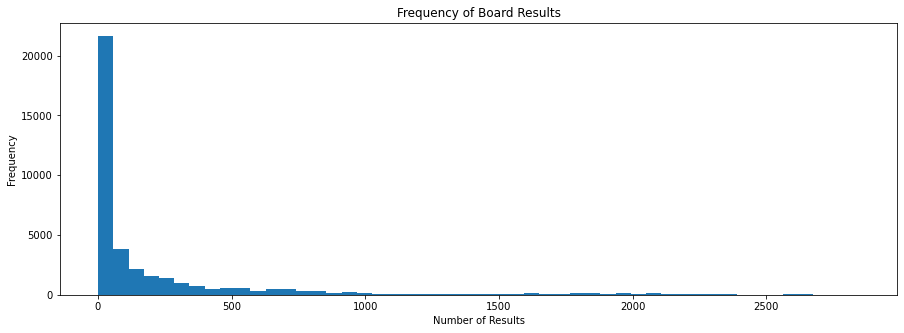

In [11]:
acbl_cgdf['EventBoard'].value_counts().plot.hist(bins=50,figsize=(15,5)).set(title='Frequency of Board Results', xlabel='Number of Results', ylabel='Frequency')

In [12]:
display(pd.DataFrame(plays[0] for plays in tcg_resultsd.values()))

,0
0,484.00
1,-180.00
2,-150.00
3,-140.00
4,-130.00
5,-120.00
6,-110.00
7,-100.00
8,-50.00
9,0.00


[Text(0.5, 1.0, 'Frequency of Number Board Results'),
 Text(0.5, 0, 'Number of Results'),
 Text(0, 0.5, 'Frequency')]

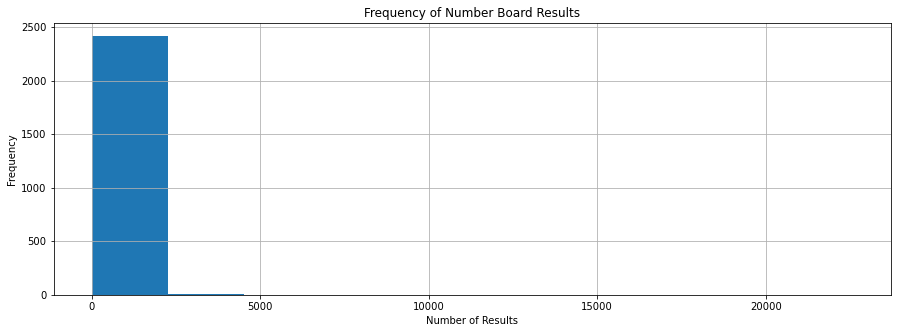

In [13]:
tcg_freq_of_plays = pd.DataFrame([{'EventBoard':k,'Plays':plays[0]} for k,plays in tcg_resultsd.items() if len(k.split('_')) == 2])
tcg_freq_of_plays['Plays'].value_counts().hist(figsize=(15,5)).set(title='Frequency of Number Board Results', xlabel='Number of Results', ylabel='Frequency')

In [14]:
# takes 8s
tcg_freq_of_scores = pd.DataFrame([{'EventBoardScore':k+'_'+str(score[0]),'Plays':score[2],'Score':score[0]} for k,plays in tcg_resultsd.items() if len(k.split('_')) == 2 for score in plays[1]])
tcg_freq_of_scores #['Plays'] #.value_counts().hist(figsize=(15,5)).set(title='Frequency of Board Results', xlabel='Number of Results', ylabel='Frequency')

,EventBoardScore,Plays,Score
0,130501A_01_-180,3.00,-180.00
1,130501A_01_-150,6.00,-150.00
2,130501A_01_-140,4.00,-140.00
3,130501A_01_-130,1.00,-130.00
4,130501A_01_-120,3.00,-120.00
5,130501A_01_-110,11.00,-110.00
6,130501A_01_-100,14.00,-100.00
7,130501A_01_-50,60.00,-50.00
8,130501A_01_0,2.00,0.00
9,130501A_01_50,29.00,50.00


[Text(0, 0.0, '0 Results'),
 Text(0, 1000000.0, '1000000 Results'),
 Text(0, 2000000.0, '2000000 Results'),
 Text(0, 3000000.0, '3000000 Results'),
 Text(0, 4000000.0, '4000000 Results'),
 Text(0, 5000000.0, '5000000 Results'),
 Text(0, 6000000.0, '6000000 Results'),
 Text(0, 7000000.0, '7000000 Results')]

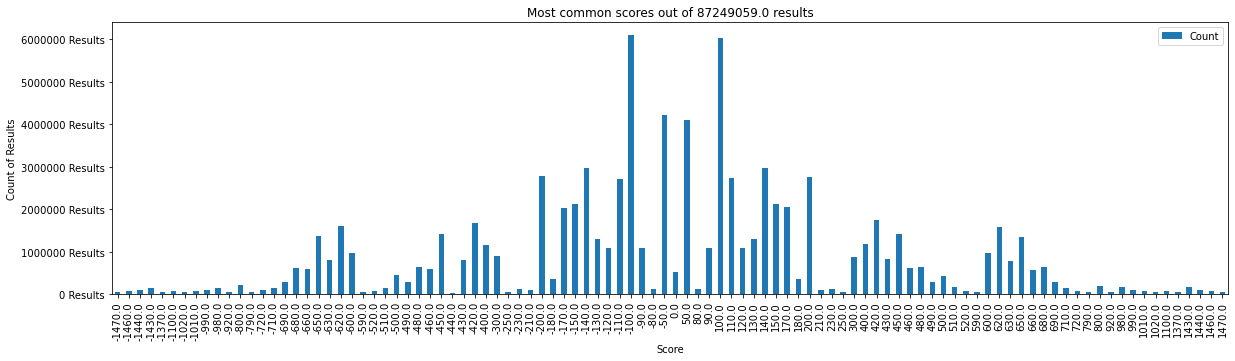

In [15]:
# show number of times a score was resulted. demonstrates custom ylabels.
scoresg = tcg_freq_of_scores.groupby('Score')
score_counts = pd.DataFrame({'Score':k,'Count':g['Plays'].sum()} for k,g in scoresg)
ax = score_counts.set_index('Score').nlargest(100,'Count').sort_index().plot(kind="bar",xlabel='Score',ylabel='Count of Results',title=f"Most common scores out of {score_counts['Count'].sum()} results",figsize=(20,5))
# example customizing yaxis labels. Needed to supress scaling of y labels (e.g. 1 vs 1000000) and adding 'Results' to ylabel.
ax.yaxis.set_major_locator(plt.ticker.FixedLocator(ax.get_yticks()))
ax.set_yticklabels([f'{t:.0f} Results' for t in ax.get_yticks()])

<AxesSubplot:title={'center':'Frequency of Scores'}, xlabel='Score', ylabel='Percent'>

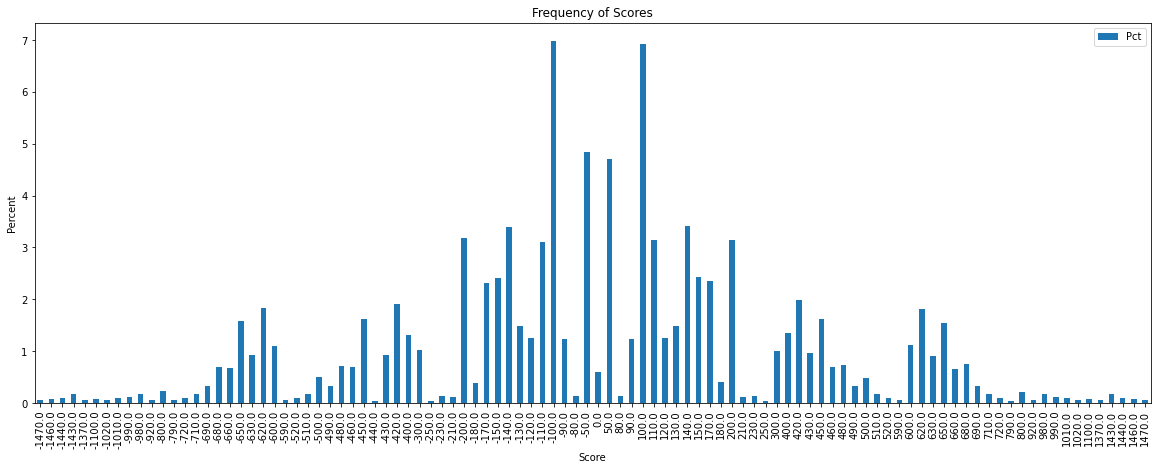

In [16]:
# add percentage column to score_counts
scoresg = tcg_freq_of_scores.groupby('Score')
score_counts = pd.DataFrame({'Score':k,'Count':g['Plays'].sum()} for k,g in scoresg)
score_counts_sum = score_counts['Count'].sum()
score_counts['Pct'] = score_counts['Count'] / score_counts_sum * 100
score_counts.nlargest(100,'Pct').sort_index().plot(kind='bar',x='Score',y='Pct',xlabel='Score',ylabel='Percent',title='Frequency of Scores',figsize=(20,7))

<AxesSubplot:title={'center':'Frequency of Score'}, xlabel='Score', ylabel='Percent'>

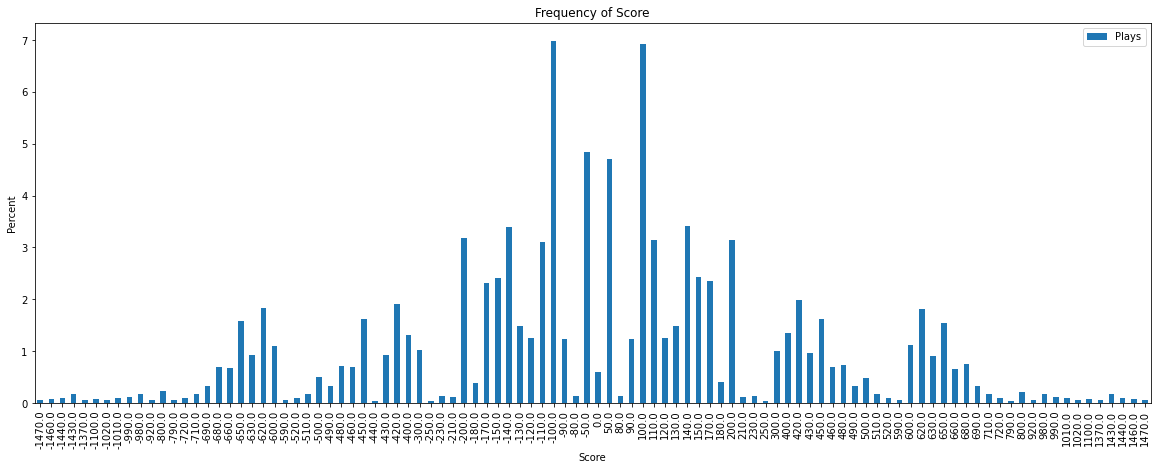

In [17]:
# plot frequency of Score
score_counts = tcg_freq_of_scores.groupby('Score').sum() / tcg_freq_of_scores['Plays'].sum() * 100
score_counts.nlargest(100,'Plays').sort_index().plot.bar(ylabel='Percent',title='Frequency of Score',figsize=(20,7))

<AxesSubplot:ylabel='Density'>

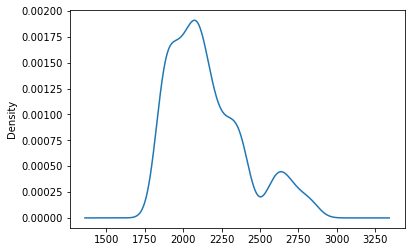

In [18]:
#fig, ax = plt.subplots(),'Plays':plays[1]
acbl_cgdf['EventBoard'].value_counts().nlargest(1000).plot.kde()

In [19]:
# takes 3s
acbl_common_game_dict_file = acblPath.joinpath('acblcgd.pkl')
with open(acbl_common_game_dict_file,'rb') as f:
    acbl_cgd = pickle.load(f)

In [20]:
# takes 3s
in_both = acbl_cgd.keys() & tcg_resultsd.keys()
acbl_not_in_tcg = [k for k in acbl_cgd.keys() if not k in tcg_resultsd]
tcg_not_in_acbl = [k for k in tcg_resultsd.keys() if k not in acbl_cgd]
print(len(acbl_cgd),len(tcg_resultsd),len(in_both),len(acbl_cgd)+len(tcg_resultsd)-len(in_both))
print(len(acbl_not_in_tcg),len(tcg_not_in_acbl),len(in_both),len(in_both)+len(acbl_not_in_tcg)+len(tcg_not_in_acbl))


908056 4649376 467990 5089442
440066 4181386 467990 5089442


In [21]:
# structure: event board: [number of scores,[[score, cumsum of frequency, frequency, match points, match points%]]...]
for k in sorted(list(in_both))[:100]:
    display(k,acbl_cgd[k],tcg_resultsd[k])

'141104E_07'

[1, [['-140', 0, 1, 0.0, 0.0]]]

[90,
 [[-500, 0, 1, 0.0, 0.0],
  [-200, 1, 1, 1.0, 0.011235955056179775],
  [-100, 2, 30, 16.5, 0.1853932584269663],
  [90, 32, 1, 32.0, 0.3595505617977528],
  [140, 33, 3, 34.0, 0.38202247191011235],
  [600, 36, 38, 54.5, 0.6123595505617978],
  [630, 74, 16, 81.5, 0.9157303370786517]]]

'141104E_08'

[1, [['140', 0, 1, 0.0, 0.0]]]

[90,
 [[-160, 0, 1, 0.0, 0.0],
  [-150, 1, 1, 1.0, 0.011235955056179775],
  [-100, 2, 12, 7.5, 0.08426966292134831],
  [-50, 14, 18, 22.5, 0.25280898876404495],
  [100, 32, 4, 33.5, 0.37640449438202245],
  [110, 36, 1, 36.0, 0.4044943820224719],
  [120, 37, 7, 40.0, 0.449438202247191],
  [140, 44, 5, 46.0, 0.5168539325842697],
  [150, 49, 10, 53.5, 0.601123595505618],
  [170, 59, 3, 60.0, 0.6741573033707865],
  [180, 62, 1, 62.0, 0.6966292134831461],
  [200, 63, 4, 64.5, 0.7247191011235955],
  [210, 67, 1, 67.0, 0.7528089887640449],
  [300, 68, 2, 68.5, 0.7696629213483146],
  [400, 70, 10, 74.5, 0.8370786516853933],
  [420, 80, 1, 80.0, 0.898876404494382],
  [430, 81, 2, 81.5, 0.9157303370786517],
  [490, 83, 1, 83.0, 0.9325842696629213],
  [500, 84, 2, 84.5, 0.949438202247191],
  [800, 86, 2, 86.5, 0.9719101123595506],
  [1100, 88, 1, 88.0, 0.9887640449438202],
  [1400, 89, 1, 89.0, 1.0]]]

'141104E_08_140'

['140', 0, 1, 0.0, 0.0]

[140, 44, 5, 46.0, 0.5168539325842697]

'150716A_01'

[12,
 [['-100', 0, 7, 3.0, 0.2727272727272727],
  ['-150', 7, 1, 7.0, 0.6363636363636364],
  ['-50', 8, 2, 8.5, 0.7727272727272727],
  ['50', 10, 2, 10.5, 0.9545454545454546]]]

[808,
 [[-570, 0, 1, 0.0, 0.0],
  [-500, 1, 2, 1.5, 0.0018587360594795538],
  [-470, 3, 1, 3.0, 0.0037174721189591076],
  [-430, 4, 2, 4.5, 0.0055762081784386614],
  [-420, 6, 1, 6.0, 0.007434944237918215],
  [-400, 7, 13, 13.0, 0.0161090458488228],
  [-300, 20, 4, 21.5, 0.02664188351920694],
  [-280, 24, 1, 24.0, 0.02973977695167286],
  [-250, 25, 1, 25.0, 0.030978934324659233],
  [-200, 26, 1, 26.0, 0.0322180916976456],
  [-180, 27, 5, 29.0, 0.03593556381660471],
  [-150, 32, 25, 44.0, 0.05452292441140025],
  [-130, 57, 119, 116.0, 0.14374225526641884],
  [-120, 176, 25, 188.0, 0.23296158612143741],
  [-110, 201, 346, 373.5, 0.4628252788104089],
  [-100, 547, 46, 569.5, 0.7057001239157373],
  [-90, 593, 9, 597.0, 0.7397769516728625],
  [-50, 602, 40, 621.5, 0.7701363073110284],
  [0, 642, 11, 647.0, 0.8017348203221809],
  [50, 653, 68, 686.5, 0.8506815365551424],
  [80, 721, 1, 721.0, 0.8934324659231723],
  [90, 722, 2, 722.5, 0.8952912019826518],
  [100, 724, 28, 737.5, 0.9138785625

'150716A_01_-100'

['-100', 0, 7, 3.0, 0.2727272727272727]

[-100, 547, 46, 569.5, 0.7057001239157373]

'150716A_01_-150'

['-150', 7, 1, 7.0, 0.6363636363636364]

[-150, 32, 25, 44.0, 0.05452292441140025]

'150716A_01_-50'

['-50', 8, 2, 8.5, 0.7727272727272727]

[-50, 602, 40, 621.5, 0.7701363073110284]

'150716A_01_50'

['50', 10, 2, 10.5, 0.9545454545454546]

[50, 653, 68, 686.5, 0.8506815365551424]

'150716A_02'

[12,
 [['-100', 0, 1, 0.0, 0.0],
  ['-110', 1, 1, 1.0, 0.09090909090909091],
  ['-130', 2, 1, 2.0, 0.18181818181818182],
  ['-200', 3, 1, 3.0, 0.2727272727272727],
  ['100', 4, 1, 4.0, 0.36363636363636365],
  ['50', 5, 7, 8.0, 0.7272727272727273]]]

[806,
 [[-200, 0, 6, 2.5, 0.003105590062111801],
  [-140, 6, 14, 12.5, 0.015527950310559006],
  [-110, 20, 35, 37.0, 0.04596273291925466],
  [-100, 55, 32, 70.5, 0.08757763975155279],
  [-90, 87, 1, 87.0, 0.10807453416149068],
  [-80, 88, 3, 89.0, 0.11055900621118013],
  [0, 91, 197, 189.0, 0.23478260869565218],
  [50, 288, 145, 360.0, 0.4472049689440994],
  [90, 433, 7, 436.0, 0.5416149068322982],
  [100, 440, 109, 494.0, 0.613664596273292],
  [110, 549, 143, 620.0, 0.7701863354037267],
  [120, 692, 1, 692.0, 0.8596273291925466],
  [130, 693, 59, 722.0, 0.8968944099378882],
  [150, 752, 39, 771.0, 0.9577639751552796],
  [170, 791, 1, 791.0, 0.9826086956521739],
  [200, 792, 3, 793.0, 0.9850931677018634],
  [300, 795, 5, 797.0, 0.9900621118012423],
  [380, 800, 2, 800.5, 0.9944099378881988],
  [500, 802, 1, 802.0, 0.9962732919254659],
  [580, 803, 1, 803.0, 0.9975155279503105],
  [600, 804, 1, 804.0, 0.9987577639751553],
  [2220, 805, 1, 805.0, 1.0]]]

'150716A_02_-100'

['-100', 0, 1, 0.0, 0.0]

[-100, 55, 32, 70.5, 0.08757763975155279]

'150716A_02_-110'

['-110', 1, 1, 1.0, 0.09090909090909091]

[-110, 20, 35, 37.0, 0.04596273291925466]

'150716A_02_-200'

['-200', 3, 1, 3.0, 0.2727272727272727]

[-200, 0, 6, 2.5, 0.003105590062111801]

'150716A_02_100'

['100', 4, 1, 4.0, 0.36363636363636365]

[100, 440, 109, 494.0, 0.613664596273292]

'150716A_02_50'

['50', 5, 7, 8.0, 0.7272727272727273]

[50, 288, 145, 360.0, 0.4472049689440994]

'150716A_03'

[12,
 [['-620', 0, 1, 0.0, 0.0],
  ['130', 1, 1, 1.0, 0.09090909090909091],
  ['140', 2, 1, 2.0, 0.18181818181818182],
  ['170', 3, 5, 5.0, 0.45454545454545453],
  ['200', 8, 1, 8.0, 0.7272727272727273],
  ['420', 9, 3, 10.0, 0.9090909090909091]]]

[806,
 [[-870, 0, 1, 0.0, 0.0],
  [-730, 1, 2, 1.5, 0.0018633540372670807],
  [-670, 3, 1, 3.0, 0.0037267080745341614],
  [-500, 4, 2, 4.5, 0.0055900621118012426],
  [-200, 6, 2, 6.5, 0.008074534161490683],
  [-170, 8, 14, 14.5, 0.018012422360248446],
  [-150, 22, 9, 26.0, 0.03229813664596273],
  [-140, 31, 71, 66.0, 0.08198757763975155],
  [-120, 102, 3, 103.0, 0.12795031055900621],
  [-110, 105, 58, 133.5, 0.1658385093167702],
  [-100, 163, 18, 171.5, 0.21304347826086956],
  [-90, 181, 1, 181.0, 0.2248447204968944],
  [-80, 182, 2, 182.5, 0.2267080745341615],
  [-50, 184, 40, 203.5, 0.2527950310559006],
  [90, 224, 162, 304.5, 0.3782608695652174],
  [100, 386, 45, 408.0, 0.506832298136646],
  [110, 431, 7, 434.0, 0.5391304347826087],
  [120, 438, 280, 577.5, 0.717391304347826],
  [150, 718, 33, 734.0, 0.9118012422360249],
  [180, 751, 8, 754.5, 0.9372670807453416],
  [200, 759, 33, 775.0, 0.9627329192546584],
  [210, 792, 1, 792.0, 0.9838509316770186],
  [300, 793, 5, 795.0, 0.987577

'150716A_03_200'

['200', 8, 1, 8.0, 0.7272727272727273]

[200, 759, 33, 775.0, 0.9627329192546584]

'150716A_04'

[12,
 [['-100', 0, 3, 1.0, 0.09090909090909091],
  ['-200', 3, 1, 3.0, 0.2727272727272727],
  ['110', 4, 5, 6.0, 0.5454545454545454],
  ['140', 9, 2, 9.5, 0.8636363636363636],
  ['300', 11, 1, 11.0, 1.0]]]

[808,
 [[-200, 0, 8, 3.5, 0.004337050805452293],
  [-100, 8, 25, 20.0, 0.024783147459727387],
  [0, 33, 1, 33.0, 0.040892193308550186],
  [130, 34, 1, 34.0, 0.042131350681536554],
  [140, 35, 1, 35.0, 0.04337050805452292],
  [170, 36, 2, 36.5, 0.045229244114002476],
  [200, 38, 2, 38.5, 0.04770755885997522],
  [230, 40, 1, 40.0, 0.04956629491945477],
  [600, 41, 1, 41.0, 0.05080545229244114],
  [620, 42, 58, 70.5, 0.08736059479553904],
  [630, 100, 10, 104.5, 0.1294919454770756],
  [650, 110, 317, 268.0, 0.33209417596034696],
  [660, 427, 38, 445.5, 0.5520446096654275],
  [680, 465, 291, 610.0, 0.7558859975216853],
  [690, 756, 41, 776.0, 0.9615861214374225],
  [710, 797, 5, 799.0, 0.990086741016109],
  [720, 802, 3, 803.0, 0.9950433705080545],
  [1430, 805, 1, 805.0, 0.9975216852540273],
  [1440, 806, 2, 806.5, 0.9993804213135068]]]

'150716A_04_-100'

['-100', 0, 3, 1.0, 0.09090909090909091]

[-100, 8, 25, 20.0, 0.024783147459727387]

'150716A_04_-200'

['-200', 3, 1, 3.0, 0.2727272727272727]

[-200, 0, 8, 3.5, 0.004337050805452293]

'150716A_04_140'

['140', 9, 2, 9.5, 0.8636363636363636]

[140, 35, 1, 35.0, 0.04337050805452292]

'150716A_05'

[12,
 [['-100', 0, 3, 1.0, 0.09090909090909091],
  ['-200', 3, 2, 3.5, 0.3181818181818182],
  ['100', 5, 1, 5.0, 0.45454545454545453],
  ['110', 6, 1, 6.0, 0.5454545454545454],
  ['140', 7, 3, 8.0, 0.7272727272727273],
  ['170', 10, 1, 10.0, 0.9090909090909091],
  ['620', 11, 1, 11.0, 1.0]]]

[808,
 [[-800, 0, 1, 0.0, 0.0],
  [-600, 1, 1, 1.0, 0.0012391573729863693],
  [-500, 2, 3, 3.0, 0.0037174721189591076],
  [-450, 5, 1, 5.0, 0.006195786864931847],
  [-400, 6, 4, 7.5, 0.00929368029739777],
  [-300, 10, 4, 11.5, 0.014250309789343246],
  [-200, 14, 42, 34.5, 0.04275092936802974],
  [-100, 56, 102, 106.5, 0.13197026022304834],
  [170, 158, 2, 158.5, 0.19640644361833953],
  [200, 160, 3, 161.0, 0.19950433705080545],
  [230, 163, 2, 163.5, 0.20260223048327136],
  [300, 165, 1, 165.0, 0.20446096654275092],
  [620, 166, 160, 245.5, 0.3042131350681537],
  [630, 326, 4, 327.5, 0.40582403965303593],
  [650, 330, 181, 420.0, 0.5204460966542751],
  [660, 511, 7, 514.0, 0.6369268897149938],
  [680, 518, 183, 609.0, 0.7546468401486989],
  [690, 701, 2, 701.5, 0.869268897149938],
  [790, 703, 1, 703.0, 0.8711276332094176],
  [1190, 704, 1, 704.0, 0.872366790582404],
  [1400, 705, 1, 705.0, 0.8736059479553904],
  [1430, 706, 89, 750.0, 0.929368029739777],
  [1440, 795, 10, 799.5, 0.990

'150716A_05_-100'

['-100', 0, 3, 1.0, 0.09090909090909091]

[-100, 56, 102, 106.5, 0.13197026022304834]

'150716A_05_-200'

['-200', 3, 2, 3.5, 0.3181818181818182]

[-200, 14, 42, 34.5, 0.04275092936802974]

'150716A_05_170'

['170', 10, 1, 10.0, 0.9090909090909091]

[170, 158, 2, 158.5, 0.19640644361833953]

'150716A_05_620'

['620', 11, 1, 11.0, 1.0]

[620, 166, 160, 245.5, 0.3042131350681537]

'150716A_06'

[12,
 [['-90', 0, 2, 0.5, 0.045454545454545456],
  ['100', 2, 1, 2.0, 0.18181818181818182],
  ['110', 3, 3, 4.0, 0.36363636363636365],
  ['130', 6, 3, 7.0, 0.6363636363636364],
  ['150', 9, 1, 9.0, 0.8181818181818182],
  ['200', 10, 1, 10.0, 0.9090909090909091],
  ['90', 11, 1, 11.0, 1.0]]]

[807,
 [[-990, 0, 1, 0.0, 0.0],
  [-790, 1, 7, 4.0, 0.004962779156327543],
  [-650, 8, 9, 12.0, 0.01488833746898263],
  [-620, 17, 12, 22.5, 0.02791563275434243],
  [-350, 29, 1, 29.0, 0.03598014888337469],
  [-300, 30, 10, 34.5, 0.042803970223325064],
  [-200, 40, 11, 45.0, 0.05583126550868486],
  [-170, 51, 9, 55.0, 0.06823821339950373],
  [-150, 60, 70, 94.5, 0.11724565756823821],
  [-140, 130, 4, 131.5, 0.163151364764268],
  [-100, 134, 288, 277.5, 0.3442928039702233],
  [-50, 422, 219, 531.0, 0.6588089330024814],
  [100, 641, 10, 645.5, 0.8008684863523573],
  [110, 651, 73, 687.0, 0.8523573200992556],
  [140, 724, 42, 744.5, 0.923697270471464],
  [170, 766, 4, 767.5, 0.9522332506203474],
  [200, 770, 13, 776.0, 0.9627791563275434],
  [210, 783, 1, 783.0, 0.9714640198511166],
  [400, 784, 11, 789.0, 0.9789081885856079],
  [420, 795, 5, 797.0, 0.988833746898263],
  [450, 800, 4, 801.5, 0.9944168734491315],
  [460, 804, 1, 804.0, 0.9975186104218362],
  [480, 805, 1, 805.0, 0.99875930

'150716A_06_100'

['100', 2, 1, 2.0, 0.18181818181818182]

[100, 641, 10, 645.5, 0.8008684863523573]

'150716A_06_110'

['110', 3, 3, 4.0, 0.36363636363636365]

[110, 651, 73, 687.0, 0.8523573200992556]

'150716A_06_200'

['200', 10, 1, 10.0, 0.9090909090909091]

[200, 770, 13, 776.0, 0.9627791563275434]

'150716A_07'

[12,
 [['-100', 0, 3, 1.0, 0.09090909090909091],
  ['-200', 3, 1, 3.0, 0.2727272727272727],
  ['130', 4, 1, 4.0, 0.36363636363636365],
  ['150', 5, 1, 5.0, 0.45454545454545453],
  ['170', 6, 1, 6.0, 0.5454545454545454],
  ['600', 7, 2, 7.5, 0.6818181818181818],
  ['630', 9, 2, 9.5, 0.8636363636363636],
  ['650', 11, 1, 11.0, 1.0]]]

[808,
 [[-300, 0, 4, 1.5, 0.0018587360594795538],
  [-200, 4, 54, 30.5, 0.037794299876084264],
  [-150, 58, 1, 58.0, 0.07187112763320942],
  [-140, 59, 2, 59.5, 0.07372986369268897],
  [-120, 61, 4, 62.5, 0.07744733581164807],
  [-110, 65, 7, 68.0, 0.08426270136307311],
  [-100, 72, 144, 143.5, 0.177819083023544],
  [-90, 216, 3, 217.0, 0.26889714993804215],
  [-80, 219, 2, 219.5, 0.27199504337050806],
  [70, 221, 10, 225.5, 0.27942998760842624],
  [90, 231, 264, 362.5, 0.44919454770755884],
  [100, 495, 20, 504.5, 0.6251548946716233],
  [110, 515, 7, 518.0, 0.6418835192069393],
  [120, 522, 193, 618.0, 0.7657992565055762],
  [140, 715, 2, 715.5, 0.8866171003717472],
  [150, 717, 55, 744.0, 0.9219330855018587],
  [180, 772, 8, 775.5, 0.9609665427509294],
  [200, 780, 16, 787.5, 0.9758364312267658],
  [300, 796, 8, 799.5, 0.9907063197026023],
  [380, 804, 1, 804.0, 0.9962825278810409],
  [500, 805, 2, 805.5, 0.9981412639405205],
  [800, 807, 1, 807.0, 1.0]]]

'150716A_07_-100'

['-100', 0, 3, 1.0, 0.09090909090909091]

[-100, 72, 144, 143.5, 0.177819083023544]

'150716A_07_-200'

['-200', 3, 1, 3.0, 0.2727272727272727]

[-200, 4, 54, 30.5, 0.037794299876084264]

'150716A_07_150'

['150', 5, 1, 5.0, 0.45454545454545453]

[150, 717, 55, 744.0, 0.9219330855018587]

'150716A_08'

[12,
 [['-120', 0, 2, 0.5, 0.045454545454545456],
  ['-50', 2, 1, 2.0, 0.18181818181818182],
  ['-90', 3, 5, 5.0, 0.45454545454545453],
  ['50', 8, 4, 9.5, 0.8636363636363636]]]

[805,
 [[-800, 0, 1, 0.0, 0.0],
  [-300, 1, 1, 1.0, 0.0012437810945273632],
  [-150, 2, 2, 2.5, 0.003109452736318408],
  [-100, 4, 3, 5.0, 0.006218905472636816],
  [-50, 7, 29, 21.0, 0.026119402985074626],
  [180, 36, 4, 37.5, 0.04664179104477612],
  [200, 40, 9, 44.0, 0.05472636815920398],
  [420, 49, 52, 74.5, 0.09266169154228855],
  [430, 101, 23, 112.0, 0.13930348258706468],
  [450, 124, 493, 370.0, 0.4601990049751244],
  [460, 617, 14, 623.5, 0.775497512437811],
  [480, 631, 150, 705.5, 0.8774875621890548],
  [490, 781, 2, 781.5, 0.9720149253731343],
  [500, 783, 1, 783.0, 0.9738805970149254],
  [510, 784, 1, 784.0, 0.9751243781094527],
  [980, 785, 20, 794.5, 0.9881840796019901]]]

'150716A_08_-50'

['-50', 2, 1, 2.0, 0.18181818181818182]

[-50, 7, 29, 21.0, 0.026119402985074626]

'150716A_09'

[12,
 [['-100', 0, 2, 0.5, 0.045454545454545456],
  ['-50', 2, 7, 5.0, 0.45454545454545453],
  ['110', 9, 1, 9.0, 0.8181818181818182],
  ['150', 10, 1, 10.0, 0.9090909090909091],
  ['420', 11, 1, 11.0, 1.0]]]

[808,
 [[-2140, 0, 2, 0.5, 0.0006195786864931846],
  [-1440, 2, 11, 7.0, 0.008674101610904586],
  [-1430, 13, 2, 13.5, 0.016728624535315983],
  [-1390, 15, 26, 27.5, 0.03407682775712516],
  [-1370, 41, 95, 88.0, 0.1090458488228005],
  [-1100, 136, 1, 136.0, 0.16852540272614622],
  [-950, 137, 1, 137.0, 0.1697645600991326],
  [-720, 138, 7, 141.0, 0.17472118959107807],
  [-690, 145, 66, 177.5, 0.21995043370508055],
  [-680, 211, 3, 212.0, 0.26270136307311026],
  [-660, 214, 245, 336.0, 0.4163568773234201],
  [-650, 459, 8, 462.5, 0.5731102850061958],
  [-640, 467, 6, 469.5, 0.5817843866171004],
  [-630, 473, 164, 554.5, 0.6871127633209417],
  [-620, 637, 45, 659.0, 0.8166047087980174],
  [-600, 682, 10, 686.5, 0.8506815365551424],
  [-500, 692, 1, 692.0, 0.8574969021065675],
  [-210, 693, 1, 693.0, 0.8587360594795539],
  [-200, 694, 1, 694.0, 0.8599752168525403],
  [-180, 695, 2, 695.5, 0.8618339529120198],
  [-170, 697, 12, 702.5, 0.8705080545229245],
  [-150, 709, 1, 709.0, 0.87856257

'150716A_09_-50'

['-50', 2, 7, 5.0, 0.45454545454545453]

[-50, 710, 1, 710.0, 0.8798017348203222]

'150716A_10'

[12,
 [['-100', 0, 4, 1.5, 0.13636363636363635],
  ['140', 4, 5, 6.0, 0.5454545454545454],
  ['170', 9, 2, 9.5, 0.8636363636363636],
  ['200', 11, 1, 11.0, 1.0]]]

[806,
 [[-1400, 0, 2, 0.5, 0.0006211180124223603],
  [-1120, 2, 1, 2.0, 0.002484472049689441],
  [-1100, 3, 2, 3.5, 0.004347826086956522],
  [-800, 5, 2, 5.5, 0.0068322981366459624],
  [-780, 7, 1, 7.0, 0.008695652173913044],
  [-680, 8, 1, 8.0, 0.009937888198757764],
  [-630, 9, 1, 9.0, 0.011180124223602485],
  [-600, 10, 6, 12.5, 0.015527950310559006],
  [-580, 16, 2, 16.5, 0.020496894409937887],
  [-540, 18, 1, 18.0, 0.02236024844720497],
  [-500, 19, 4, 20.5, 0.02546583850931677],
  [-400, 23, 18, 31.5, 0.0391304347826087],
  [-380, 41, 1, 41.0, 0.05093167701863354],
  [-340, 42, 1, 42.0, 0.05217391304347826],
  [-300, 43, 45, 65.0, 0.08074534161490683],
  [-210, 88, 4, 89.5, 0.11118012422360249],
  [-200, 92, 73, 128.0, 0.15900621118012423],
  [-180, 165, 46, 187.5, 0.2329192546583851],
  [-170, 211, 6, 213.5, 0.26521739130434785],
  [-150, 217, 181, 307.0, 0.3813664596273292],
  [-140, 398, 28, 411.5, 0.5111801242236025],
  [-130, 426, 3, 427.0, 0.5304347826086957],
  [-120, 429,

'150716A_10_-100'

['-100', 0, 4, 1.5, 0.13636363636363635]

[-100, 603, 44, 624.5, 0.775776397515528]

'150716A_10_200'

['200', 11, 1, 11.0, 1.0]

[200, 791, 9, 795.0, 0.9875776397515528]

'150716A_11'

[12,
 [['-100', 0, 3, 1.0, 0.09090909090909091],
  ['-110', 3, 1, 3.0, 0.2727272727272727],
  ['-130', 4, 2, 4.5, 0.4090909090909091],
  ['-150', 6, 1, 6.0, 0.5454545454545454],
  ['-50', 7, 3, 8.0, 0.7272727272727273],
  ['50', 10, 2, 10.5, 0.9545454545454546]]]

[807,
 [[-800, 0, 1, 0.0, 0.0],
  [-500, 1, 4, 2.5, 0.003101736972704715],
  [-490, 5, 1, 5.0, 0.00620347394540943],
  [-400, 6, 2, 6.5, 0.008064516129032258],
  [-300, 8, 8, 11.5, 0.014267990074441687],
  [-280, 16, 1, 16.0, 0.019851116625310174],
  [-200, 17, 2, 17.5, 0.021712158808933003],
  [-180, 19, 2, 19.5, 0.024193548387096774],
  [-150, 21, 9, 25.0, 0.031017369727047148],
  [-140, 30, 2, 30.5, 0.03784119106699752],
  [-120, 32, 10, 36.5, 0.04528535980148883],
  [-110, 42, 2, 42.5, 0.05272952853598015],
  [-100, 44, 53, 70.0, 0.08684863523573201],
  [-90, 97, 1, 97.0, 0.12034739454094293],
  [-50, 98, 52, 123.5, 0.1532258064516129],
  [50, 150, 68, 183.5, 0.22766749379652607],
  [90, 218, 4, 219.5, 0.27233250620347393],
  [100, 222, 149, 296.0, 0.36724565756823824],
  [110, 371, 58, 399.5, 0.4956575682382134],
  [120, 429, 25, 441.0, 0.5471464019851117],
  [130, 454, 2, 454.5, 0.5638957816377171],
  [140, 456, 122, 516.5, 0.640818858560794],
  [150, 578, 120, 637.5, 0.790942928

'150716A_11_-100'

['-100', 0, 3, 1.0, 0.09090909090909091]

[-100, 44, 53, 70.0, 0.08684863523573201]

'150716A_11_-110'

['-110', 3, 1, 3.0, 0.2727272727272727]

[-110, 42, 2, 42.5, 0.05272952853598015]

'150716A_11_-150'

['-150', 6, 1, 6.0, 0.5454545454545454]

[-150, 21, 9, 25.0, 0.031017369727047148]

'150716A_11_-50'

['-50', 7, 3, 8.0, 0.7272727272727273]

[-50, 98, 52, 123.5, 0.1532258064516129]

'150716A_11_50'

['50', 10, 2, 10.5, 0.9545454545454546]

[50, 150, 68, 183.5, 0.22766749379652607]

'150716A_12'

[12,
 [['-140', 0, 3, 1.0, 0.09090909090909091],
  ['-170', 3, 2, 3.5, 0.3181818181818182],
  ['-200', 5, 2, 5.5, 0.5],
  ['-420', 7, 1, 7.0, 0.6363636363636364],
  ['-450', 8, 1, 8.0, 0.7272727272727273],
  ['-480', 9, 1, 9.0, 0.8181818181818182],
  ['50', 10, 2, 10.5, 0.9545454545454546]]]

[805,
 [[-800, 0, 1, 0.0, 0.0],
  [-500, 1, 1, 1.0, 0.0012437810945273632],
  [-460, 2, 5, 4.0, 0.004975124378109453],
  [-450, 7, 24, 18.5, 0.023009950248756218],
  [-430, 31, 89, 75.0, 0.09328358208955224],
  [-420, 120, 525, 382.0, 0.47512437810945274],
  [-400, 645, 74, 681.5, 0.847636815920398],
  [-200, 719, 4, 720.5, 0.8961442786069652],
  [-180, 723, 3, 724.0, 0.900497512437811],
  [-170, 726, 20, 735.5, 0.9148009950248757],
  [-150, 746, 5, 748.0, 0.9303482587064676],
  [-140, 751, 6, 753.5, 0.9371890547263682],
  [-120, 757, 1, 757.0, 0.9415422885572139],
  [-100, 758, 1, 758.0, 0.9427860696517413],
  [-90, 759, 1, 759.0, 0.9440298507462687],
  [0, 760, 1, 760.0, 0.945273631840796],
  [50, 761, 34, 777.5, 0.9670398009950248],
  [100, 795, 4, 796.5, 0.9906716417910447],
  [110, 799, 1, 799.0, 0.9937810945273632],
  [150, 800, 1, 800.0, 0.9950248756218906],
  [300, 801, 2, 801.5, 0.9968905472636815],
  [500, 803, 1, 803.0, 0.9987562189054726],
  [630, 804, 1, 804.0, 1.0]]]

'150716A_12_-140'

['-140', 0, 3, 1.0, 0.09090909090909091]

[-140, 751, 6, 753.5, 0.9371890547263682]

'150716A_12_-170'

['-170', 3, 2, 3.5, 0.3181818181818182]

[-170, 726, 20, 735.5, 0.9148009950248757]

'150716A_12_-200'

['-200', 5, 2, 5.5, 0.5]

[-200, 719, 4, 720.5, 0.8961442786069652]

'150716A_12_-420'

['-420', 7, 1, 7.0, 0.6363636363636364]

[-420, 120, 525, 382.0, 0.47512437810945274]

'150716A_12_-450'

['-450', 8, 1, 8.0, 0.7272727272727273]

[-450, 7, 24, 18.5, 0.023009950248756218]

'150716A_12_50'

['50', 10, 2, 10.5, 0.9545454545454546]

[50, 761, 34, 777.5, 0.9670398009950248]

'150716A_13'

[12,
 [['-1100', 0, 1, 0.0, 0.0],
  ['-140', 1, 3, 2.0, 0.18181818181818182],
  ['-170', 4, 2, 4.5, 0.4090909090909091],
  ['-200', 6, 2, 6.5, 0.5909090909090909],
  ['-300', 8, 1, 8.0, 0.7272727272727273],
  ['-650', 9, 1, 9.0, 0.8181818181818182],
  ['200', 10, 1, 10.0, 0.9090909090909091],
  ['90', 11, 1, 11.0, 1.0]]]

[810,
 [[-930, 0, 3, 1.0, 0.0012360939431396785],
  [-800, 3, 2, 3.5, 0.004326328800988875],
  [-790, 5, 4, 6.5, 0.008034610630407911],
  [-730, 9, 1, 9.0, 0.011124845488257108],
  [-650, 10, 4, 11.5, 0.014215080346106305],
  [-620, 14, 38, 32.5, 0.040173053152039555],
  [-500, 52, 10, 56.5, 0.06983930778739184],
  [-400, 62, 2, 62.5, 0.07725587144622992],
  [-300, 64, 15, 71.0, 0.08776266996291718],
  [-200, 79, 91, 124.0, 0.15327564894932014],
  [-170, 170, 163, 251.0, 0.31025957972805934],
  [-140, 333, 55, 360.0, 0.44499381953028433],
  [-110, 388, 5, 390.0, 0.4820766378244747],
  [-100, 393, 150, 467.5, 0.5778739184177998],
  [90, 543, 19, 552.0, 0.6823238566131026],
  [100, 562, 49, 586.0, 0.7243510506798516],
  [110, 611, 125, 673.0, 0.8318912237330037],
  [120, 736, 1, 736.0, 0.9097651421508035],
  [130, 737, 23, 748.0, 0.9245982694684796],
  [150, 760, 4, 761.5, 0.9412855377008653],
  [170, 764, 2, 764.5, 0.9449938195302843],
  [200, 766, 23, 777.0, 0.9604449938195303],
  [300

'150716A_13_-140'

['-140', 1, 3, 2.0, 0.18181818181818182]

[-140, 333, 55, 360.0, 0.44499381953028433]

'150716A_13_-170'

['-170', 4, 2, 4.5, 0.4090909090909091]

[-170, 170, 163, 251.0, 0.31025957972805934]

'150716A_13_-200'

['-200', 6, 2, 6.5, 0.5909090909090909]

[-200, 79, 91, 124.0, 0.15327564894932014]

'150716A_13_-300'

['-300', 8, 1, 8.0, 0.7272727272727273]

[-300, 64, 15, 71.0, 0.08776266996291718]

'150716A_13_-650'

['-650', 9, 1, 9.0, 0.8181818181818182]

[-650, 10, 4, 11.5, 0.014215080346106305]

'150716A_13_200'

['200', 10, 1, 10.0, 0.9090909090909091]

[200, 766, 23, 777.0, 0.9604449938195303]

'150716A_13_90'

['90', 11, 1, 11.0, 1.0]

[90, 543, 19, 552.0, 0.6823238566131026]

'150716A_14'

[12,
 [['-110', 0, 1, 0.0, 0.0],
  ['-120', 1, 3, 2.0, 0.18181818181818182],
  ['-50', 4, 1, 4.0, 0.36363636363636365],
  ['-90', 5, 2, 5.5, 0.5],
  ['0', 7, 1, 7.0, 0.6363636363636364],
  ['100', 8, 1, 8.0, 0.7272727272727273],
  ['50', 9, 3, 10.0, 0.9090909090909091]]]

[809,
 [[-1400, 0, 1, 0.0, 0.0],
  [-1200, 1, 1, 1.0, 0.0012376237623762376],
  [-980, 2, 106, 54.5, 0.06745049504950495],
  [-800, 108, 2, 108.5, 0.1342821782178218],
  [-490, 110, 1, 110.0, 0.13613861386138615],
  [-480, 111, 382, 301.5, 0.37314356435643564],
  [-450, 493, 232, 608.5, 0.7530940594059405],
  [-420, 725, 61, 755.0, 0.9344059405940595],
  [-230, 786, 1, 786.0, 0.9727722772277227],
  [0, 787, 1, 787.0, 0.974009900990099],
  [50, 788, 15, 795.0, 0.9839108910891089],
  [100, 803, 5, 805.0, 0.9962871287128713],
  [200, 808, 1, 808.0, 1.0]]]

'150716A_14_0'

['0', 7, 1, 7.0, 0.6363636363636364]

[0, 787, 1, 787.0, 0.974009900990099]

'150716A_14_100'

['100', 8, 1, 8.0, 0.7272727272727273]

[100, 803, 5, 805.0, 0.9962871287128713]

'150716A_14_50'

['50', 9, 3, 10.0, 0.9090909090909091]

[50, 788, 15, 795.0, 0.9839108910891089]

'150716A_15'

[12,
 [['-100', 0, 1, 0.0, 0.0],
  ['600', 1, 2, 1.5, 0.13636363636363635],
  ['630', 3, 4, 4.5, 0.4090909090909091],
  ['660', 7, 4, 8.5, 0.7727272727272727],
  ['690', 11, 1, 11.0, 1.0]]]

[807,
 [[-500, 0, 3, 1.0, 0.0012406947890818859],
  [-430, 3, 1, 3.0, 0.0037220843672456576],
  [-400, 4, 5, 6.0, 0.007444168734491315],
  [-300, 9, 12, 14.5, 0.017990074441687345],
  [-280, 21, 1, 21.0, 0.026054590570719603],
  [-200, 22, 47, 45.0, 0.05583126550868486],
  [-180, 69, 3, 70.0, 0.08684863523573201],
  [-170, 72, 3, 73.0, 0.09057071960297766],
  [-150, 75, 30, 89.5, 0.11104218362282878],
  [-140, 105, 19, 114.0, 0.141439205955335],
  [-120, 124, 74, 160.5, 0.19913151364764267],
  [-110, 198, 18, 206.5, 0.25620347394540943],
  [-100, 216, 65, 248.0, 0.3076923076923077],
  [-90, 281, 113, 337.0, 0.41811414392059554],
  [-80, 394, 4, 395.5, 0.49069478908188585],
  [0, 398, 2, 398.5, 0.4944168734491315],
  [50, 400, 204, 501.5, 0.6222084367245657],
  [70, 604, 2, 604.5, 0.75],
  [80, 606, 8, 609.5, 0.7562034739454094],
  [90, 614, 22, 624.5, 0.7748138957816377],
  [100, 636, 114, 692.5, 0.859181141439206],
  [110, 750, 8, 753.5, 0.934863523573201],
  [120, 758, 17, 766.0, 0.9

'150716A_15_-100'

['-100', 0, 1, 0.0, 0.0]

[-100, 216, 65, 248.0, 0.3076923076923077]

'150716A_15_630'

['630', 3, 4, 4.5, 0.4090909090909091]

[630, 806, 1, 806.0, 1.0]

'150716A_16'

[12,
 [['-100', 0, 1, 0.0, 0.0],
  ['-150', 1, 1, 1.0, 0.09090909090909091],
  ['-50', 2, 1, 2.0, 0.18181818181818182],
  ['100', 3, 1, 3.0, 0.2727272727272727],
  ['120', 4, 1, 4.0, 0.36363636363636365],
  ['150', 5, 1, 5.0, 0.45454545454545453],
  ['200', 6, 1, 6.0, 0.5454545454545454],
  ['300', 7, 1, 7.0, 0.6363636363636364],
  ['90', 8, 4, 9.5, 0.8636363636363636]]]

[806,
 [[-620, 0, 1, 0.0, 0.0],
  [-50, 1, 10, 5.5, 0.0068322981366459624],
  [100, 11, 1, 11.0, 0.013664596273291925],
  [110, 12, 5, 14.0, 0.017391304347826087],
  [130, 17, 3, 18.0, 0.02236024844720497],
  [150, 20, 1, 20.0, 0.024844720496894408],
  [170, 21, 3, 22.0, 0.02732919254658385],
  [180, 24, 1, 24.0, 0.02981366459627329],
  [200, 25, 51, 50.0, 0.062111801242236024],
  [210, 76, 1, 76.0, 0.09440993788819876],
  [230, 77, 14, 83.5, 0.10372670807453416],
  [240, 91, 1, 91.0, 0.11304347826086956],
  [260, 92, 13, 98.0, 0.12173913043478261],
  [300, 105, 6, 107.5, 0.13354037267080746],
  [400, 111, 2, 111.5, 0.13850931677018632],
  [420, 113, 12, 118.5, 0.14720496894409937],
  [430, 125, 8, 128.5, 0.15962732919254657],
  [450, 133, 513, 389.0, 0.4832298136645963],
  [460, 646, 4, 647.5, 0.8043478260869565],
  [480, 650, 79, 689.0, 0.8559006211180125],
  [500, 729, 2, 729.5, 0.9062111801242236],
  [510, 731, 71, 766.0, 0.9515527950310559],
  [520, 802, 1, 802.0, 0.99627329192546

'150716A_16_-50'

['-50', 2, 1, 2.0, 0.18181818181818182]

[-50, 1, 10, 5.5, 0.0068322981366459624]

'150716A_16_100'

['100', 3, 1, 3.0, 0.2727272727272727]

[100, 11, 1, 11.0, 0.013664596273291925]

'150716A_16_150'

['150', 5, 1, 5.0, 0.45454545454545453]

[150, 20, 1, 20.0, 0.024844720496894408]

'150716A_16_200'

['200', 6, 1, 6.0, 0.5454545454545454]

[200, 25, 51, 50.0, 0.062111801242236024]

'150716A_16_300'

['300', 7, 1, 7.0, 0.6363636363636364]

[300, 105, 6, 107.5, 0.13354037267080746]

'150716A_17'

[12,
 [['100', 0, 1, 0.0, 0.0],
  ['450', 1, 10, 5.5, 0.5],
  ['510', 11, 1, 11.0, 1.0]]]

[810,
 [[-800, 0, 1, 0.0, 0.0],
  [-530, 1, 2, 1.5, 0.001854140914709518],
  [-500, 3, 1, 3.0, 0.003708281829419036],
  [-420, 4, 1, 4.0, 0.004944375772558714],
  [-300, 5, 14, 11.5, 0.014215080346106305],
  [-250, 19, 3, 20.0, 0.024721878862793572],
  [-200, 22, 2, 22.5, 0.02781211372064277],
  [-170, 24, 2, 24.5, 0.030284301606922127],
  [-150, 26, 13, 32.0, 0.03955500618046971],
  [-140, 39, 94, 85.5, 0.10568603213844252],
  [-130, 133, 1, 133.0, 0.16440049443757726],
  [-110, 134, 5, 136.0, 0.1681087762669963],
  [-100, 139, 58, 167.5, 0.20704573547589616],
  [-50, 197, 88, 240.5, 0.2972805933250927],
  [0, 285, 1, 285.0, 0.3522867737948084],
  [50, 286, 166, 368.5, 0.45550061804697156],
  [90, 452, 2, 452.5, 0.5593325092707045],
  [100, 454, 66, 486.5, 0.6013597033374537],
  [110, 520, 38, 538.5, 0.6656365883807169],
  [130, 558, 109, 612.0, 0.7564894932014833],
  [140, 667, 19, 676.0, 0.8355995055624228],
  [150, 686, 50, 710.5, 0.8782447466007417],
  [170, 736, 9, 740.0, 0.91470

'150716A_17_100'

['100', 0, 1, 0.0, 0.0]

[100, 454, 66, 486.5, 0.6013597033374537]

'150716A_17_510'

['510', 11, 1, 11.0, 1.0]

[510, 791, 2, 791.5, 0.9783683559950557]

'150716A_18'

[12,
 [['-100', 0, 2, 0.5, 0.045454545454545456],
  ['100', 2, 1, 2.0, 0.18181818181818182],
  ['1100', 3, 1, 3.0, 0.2727272727272727],
  ['140', 4, 1, 4.0, 0.36363636363636365],
  ['1430', 5, 1, 5.0, 0.45454545454545453],
  ['300', 6, 1, 6.0, 0.5454545454545454],
  ['500', 7, 1, 7.0, 0.6363636363636364],
  ['650', 8, 3, 9.0, 0.8181818181818182],
  ['680', 11, 1, 11.0, 1.0]]]

[809,
 [[-1400, 0, 1, 0.0, 0.0],
  [-1100, 1, 3, 2.0, 0.0024752475247524753],
  [-800, 4, 3, 5.0, 0.006188118811881188],
  [-690, 7, 1, 7.0, 0.008663366336633664],
  [-530, 8, 1, 8.0, 0.009900990099009901],
  [-500, 9, 5, 11.0, 0.013613861386138614],
  [-450, 14, 24, 25.5, 0.03155940594059406],
  [-420, 38, 207, 141.0, 0.1745049504950495],
  [-400, 245, 3, 246.0, 0.30445544554455445],
  [-300, 248, 15, 255.0, 0.3155940594059406],
  [-230, 263, 1, 263.0, 0.3254950495049505],
  [-200, 264, 53, 290.0, 0.3589108910891089],
  [-170, 317, 97, 365.0, 0.45173267326732675],
  [-140, 414, 162, 494.5, 0.6120049504950495],
  [-130, 576, 2, 576.5, 0.713490099009901],
  [-110, 578, 44, 599.5, 0.7419554455445545],
  [-100, 622, 20, 631.5, 0.781559405940594],
  [-90, 642, 1, 642.0, 0.7945544554455446],
  [-80, 643, 2, 643.5, 0.7964108910891089],
  [-70, 645, 1, 645.0, 0.7982673267326733],
  [50, 646, 102, 696.5, 0.8620049504950495],
  [90, 748, 3, 749.0, 0.926980198019802],
  [100, 751, 42, 771.5, 0.9

'150716A_18_-100'

['-100', 0, 2, 0.5, 0.045454545454545456]

[-100, 622, 20, 631.5, 0.781559405940594]

'150716A_18_100'

['100', 2, 1, 2.0, 0.18181818181818182]

[100, 751, 42, 771.5, 0.9548267326732673]

'150716A_19'

[12,
 [['-650', 0, 1, 0.0, 0.0],
  ['-680', 1, 7, 4.0, 0.36363636363636365],
  ['-710', 8, 4, 9.5, 0.8636363636363636]]]

[810,
 [[-800, 0, 1, 0.0, 0.0],
  [-630, 1, 1, 1.0, 0.0012360939431396785],
  [-300, 2, 1, 2.0, 0.002472187886279357],
  [-200, 3, 1, 3.0, 0.003708281829419036],
  [-150, 4, 3, 5.0, 0.006180469715698393],
  [-100, 7, 12, 12.5, 0.015451174289245983],
  [-90, 19, 1, 19.0, 0.023485784919653894],
  [-50, 20, 97, 68.0, 0.08405438813349815],
  [100, 117, 1, 117.0, 0.1446229913473424],
  [110, 118, 4, 119.5, 0.1477132262051916],
  [120, 122, 1, 122.0, 0.1508034610630408],
  [130, 123, 4, 124.5, 0.15389369592089],
  [140, 127, 8, 130.5, 0.16131025957972805],
  [150, 135, 6, 137.5, 0.1699629171817058],
  [170, 141, 6, 143.5, 0.1773794808405439],
  [180, 147, 6, 149.5, 0.18479604449938195],
  [200, 153, 2, 153.5, 0.18974042027194066],
  [210, 155, 4, 156.5, 0.1934487021013597],
  [400, 159, 139, 228.0, 0.28182941903584674],
  [420, 298, 10, 302.5, 0.37391841779975277],
  [430, 308, 211, 413.0, 0.5105067985166872],
  [450, 519, 3, 520.0, 0.6427688504326329],
  [460, 522, 280, 661.5, 0.81767614338

'150716A_20'

[12,
 [['-100', 0, 1, 0.0, 0.0],
  ['-300', 1, 2, 1.5, 0.13636363636363635],
  ['-500', 3, 1, 3.0, 0.2727272727272727],
  ['100', 4, 1, 4.0, 0.36363636363636365],
  ['110', 5, 1, 5.0, 0.45454545454545453],
  ['150', 6, 1, 6.0, 0.5454545454545454],
  ['200', 7, 3, 8.0, 0.7272727272727273],
  ['300', 10, 1, 10.0, 0.9090909090909091],
  ['80', 11, 1, 11.0, 1.0]]]

[807,
 [[-1130, 0, 1, 0.0, 0.0],
  [-1100, 1, 1, 1.0, 0.0012406947890818859],
  [-1050, 2, 2, 2.5, 0.003101736972704715],
  [-1000, 4, 2, 4.5, 0.005583126550868486],
  [-990, 6, 6, 8.5, 0.01054590570719603],
  [-850, 12, 46, 34.5, 0.042803970223325064],
  [-800, 58, 25, 70.0, 0.08684863523573201],
  [-790, 83, 1, 83.0, 0.10297766749379653],
  [-680, 84, 3, 85.0, 0.1054590570719603],
  [-650, 87, 189, 181.0, 0.22456575682382135],
  [-620, 276, 18, 284.5, 0.3529776674937965],
  [-500, 294, 109, 348.0, 0.4317617866004963],
  [-400, 403, 2, 403.5, 0.500620347394541],
  [-300, 405, 12, 410.5, 0.5093052109181141],
  [-200, 417, 204, 518.5, 0.6433002481389578],
  [-100, 621, 124, 682.5, 0.8467741935483871],
  [100, 745, 21, 755.0, 0.9367245657568238],
  [140, 766, 12, 771.5, 0.957196029776675],
  [200, 778, 15, 785.0, 0.9739454094292804],
  [560, 793, 1, 793.0, 0.9838709677419355],
  [620, 794, 3, 795.0, 0.9863523573200993],
  [650, 797, 1, 797.0, 0.988833746898263],
  [730, 798, 7, 801.0, 0.

'150716A_20_-100'

['-100', 0, 1, 0.0, 0.0]

[-100, 621, 124, 682.5, 0.8467741935483871]

'150716A_20_-300'

['-300', 1, 2, 1.5, 0.13636363636363635]

[-300, 405, 12, 410.5, 0.5093052109181141]

'150716A_20_-500'

['-500', 3, 1, 3.0, 0.2727272727272727]

[-500, 294, 109, 348.0, 0.4317617866004963]

'150716A_20_100'

['100', 4, 1, 4.0, 0.36363636363636365]

[100, 745, 21, 755.0, 0.9367245657568238]

'150716A_20_200'

['200', 7, 3, 8.0, 0.7272727272727273]

[200, 778, 15, 785.0, 0.9739454094292804]

'150716A_21'

[12,
 [['-100', 0, 1, 0.0, 0.0],
  ['-110', 1, 1, 1.0, 0.09090909090909091],
  ['-200', 2, 5, 4.0, 0.36363636363636365],
  ['100', 7, 1, 7.0, 0.6363636363636364],
  ['110', 8, 1, 8.0, 0.7272727272727273],
  ['140', 9, 1, 9.0, 0.8181818181818182],
  ['170', 10, 1, 10.0, 0.9090909090909091],
  ['300', 11, 1, 11.0, 1.0]]]

[809,
 [[-800, 0, 1, 0.0, 0.0],
  [-500, 1, 1, 1.0, 0.0012376237623762376],
  [-300, 2, 10, 6.5, 0.008044554455445545],
  [-200, 12, 43, 33.0, 0.04084158415841584],
  [-100, 55, 178, 143.5, 0.1775990099009901],
  [-90, 233, 1, 233.0, 0.28836633663366334],
  [50, 234, 1, 234.0, 0.2896039603960396],
  [80, 235, 1, 235.0, 0.2908415841584158],
  [90, 236, 6, 238.5, 0.29517326732673266],
  [100, 242, 3, 243.0, 0.30074257425742573],
  [110, 245, 5, 247.0, 0.3056930693069307],
  [120, 250, 444, 471.5, 0.5835396039603961],
  [130, 694, 4, 695.5, 0.8607673267326733],
  [150, 698, 90, 742.5, 0.9189356435643564],
  [180, 788, 7, 791.0, 0.9789603960396039],
  [300, 795, 1, 795.0, 0.9839108910891089],
  [500, 796, 1, 796.0, 0.9851485148514851],
  [600, 797, 8, 800.5, 0.9907178217821783],
  [660, 805, 1, 805.0, 0.9962871287128713],
  [800, 806, 3, 807.0, 0.9987623762376238]]]

'150716A_21_-100'

['-100', 0, 1, 0.0, 0.0]

[-100, 55, 178, 143.5, 0.1775990099009901]

'150716A_21_-200'

['-200', 2, 5, 4.0, 0.36363636363636365]

[-200, 12, 43, 33.0, 0.04084158415841584]

'150716A_21_100'

['100', 7, 1, 7.0, 0.6363636363636364]

[100, 242, 3, 243.0, 0.30074257425742573]

'150716A_21_110'

['110', 8, 1, 8.0, 0.7272727272727273]

[110, 245, 5, 247.0, 0.3056930693069307]

'150716A_21_300'

['300', 11, 1, 11.0, 1.0]

[300, 795, 1, 795.0, 0.9839108910891089]

'150716A_22'

[12,
 [['-100', 0, 1, 0.0, 0.0],
  ['-620', 1, 4, 2.5, 0.22727272727272727],
  ['-650', 5, 3, 6.0, 0.5454545454545454],
  ['-990', 8, 1, 8.0, 0.7272727272727273],
  ['100', 9, 2, 9.5, 0.8636363636363636],
  ['200', 11, 1, 11.0, 1.0]]]

[809,
 [[-1100, 0, 1, 0.0, 0.0],
  [-800, 1, 1, 1.0, 0.0012376237623762376],
  [-660, 2, 1, 2.0, 0.0024752475247524753],
  [-500, 3, 1, 3.0, 0.0037128712871287127],
  [-380, 4, 1, 4.0, 0.0049504950495049506],
  [-300, 5, 7, 8.0, 0.009900990099009901],
  [-200, 12, 4, 13.5, 0.01670792079207921],
  [-180, 16, 6, 18.5, 0.022896039603960396],
  [-150, 22, 45, 44.0, 0.054455445544554455],
  [-120, 67, 50, 91.5, 0.11324257425742575],
  [-110, 117, 3, 118.0, 0.14603960396039603],
  [-100, 120, 68, 153.5, 0.18997524752475248],
  [-90, 188, 36, 205.5, 0.25433168316831684],
  [-50, 224, 223, 335.0, 0.4146039603960396],
  [80, 447, 1, 447.0, 0.5532178217821783],
  [90, 448, 3, 449.0, 0.5556930693069307],
  [100, 451, 40, 470.5, 0.5823019801980198],
  [110, 491, 162, 571.5, 0.7073019801980198],
  [140, 653, 45, 675.0, 0.8353960396039604],
  [170, 698, 1, 698.0, 0.8638613861386139],
  [200, 699, 58, 727.5, 0.9003712871287128],
  [260, 757, 1, 757.0, 0.9368811881188119],
  [300, 758, 40, 777.5, 0.96

'150716A_22_-100'

['-100', 0, 1, 0.0, 0.0]

[-100, 120, 68, 153.5, 0.18997524752475248]

'150716A_22_100'

['100', 9, 2, 9.5, 0.8636363636363636]

[100, 451, 40, 470.5, 0.5823019801980198]

'150716A_22_200'

['200', 11, 1, 11.0, 1.0]

[200, 699, 58, 727.5, 0.9003712871287128]

'150716A_23'

[12,
 [['-100', 0, 2, 0.5, 0.045454545454545456],
  ['-150', 2, 1, 2.0, 0.18181818181818182],
  ['-200', 3, 2, 3.5, 0.3181818181818182],
  ['-800', 5, 1, 5.0, 0.45454545454545453],
  ['-90', 6, 1, 6.0, 0.5454545454545454],
  ['100', 7, 4, 8.5, 0.7727272727272727],
  ['120', 11, 1, 11.0, 1.0]]]

[810,
 [[-2220, 0, 65, 32.0, 0.03955500618046971],
  [-2140, 65, 6, 67.5, 0.0834363411619283],
  [-1880, 71, 1, 71.0, 0.08776266996291718],
  [-1660, 72, 1, 72.0, 0.08899876390605686],
  [-1470, 73, 348, 246.5, 0.3046971569839308],
  [-1440, 421, 163, 502.0, 0.6205191594561187],
  [-1430, 584, 1, 584.0, 0.7218788627935723],
  [-1390, 585, 22, 595.5, 0.7360939431396786],
  [-1370, 607, 12, 612.5, 0.7571075401730532],
  [-720, 619, 49, 643.0, 0.7948084054388134],
  [-690, 668, 26, 680.5, 0.8411619283065513],
  [-660, 694, 2, 694.5, 0.8584672435105068],
  [-650, 696, 2, 696.5, 0.8609394313967862],
  [-640, 698, 13, 704.0, 0.8702101359703337],
  [-620, 711, 8, 714.5, 0.8831891223733004],
  [-270, 719, 1, 719.0, 0.8887515451174289],
  [-240, 720, 2, 720.5, 0.8906056860321384],
  [-200, 722, 1, 722.0, 0.892459826946848],
  [-190, 723, 11, 728.0, 0.899876390605686],
  [-170, 734, 6, 736.5, 0.9103831891223733],
  [-150, 740, 1, 740.0, 0.9147095179233622],
  [-130, 741, 4, 742.5, 0.917799752781

'150716A_23_-150'

['-150', 2, 1, 2.0, 0.18181818181818182]

[-150, 740, 1, 740.0, 0.9147095179233622]

'150716A_23_-200'

['-200', 3, 2, 3.5, 0.3181818181818182]

[-200, 722, 1, 722.0, 0.892459826946848]